## Feature Engineering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("/home/vinayakgaur07/Downloads/Dataset.xlsx")
df

,ID,Name,Country,Age,Member,Score A,Score B,Class
0,7896,Mark,Canada,45.0,1,180.0,9.0,A
1,9865,Yuze,Japan,NaN,0,165.0,8.5,B
2,4678,Becky,USA,38.0,Y,140.0,6.0,B
3,3324,Mike,890,50.0,0,90.0,8.7,C
4,7896,Mark,Canada,45.0,1,180.0,9.0,A
5,7896,Jose,Mexico,98.0,0,60.5,5.0,A
6,8962,Emma,Germany,39.0,1,140.0,8.0,B


Issues that we observe in sample data above:

- Missing data in Age Column: we can input the missing value or drop it 
- Data Type mismatch:   `replace()`
    - Wrong data type in Country: eg. 890
    - Wrong data value in Member: eg. Y instead of 1
- Score A & B have different scales. Need scaling or normalization
- Score A & B has inconsistent number types(int vs float). Need to investigate if we are losing info when decimal values were dropped 
- Potential Outliers:
    - Age column
    - Score A has 60.5
- Same ID for different names (mark & jose)
- Mark is duplicate `drop_duplicates()`
- We need to encode categorical text values for ML
- Some ML algorithms perform well with bins instead of continuous range eg. convert Age column into bins 10-20, 20-30, etc...
- Data Quality Check: check if class is associated with scores. If so, then it doesn't make sense to have 60.5 with grade A


What are Features?
- They are individual properties or characteristics (attributes) of the population to understand its patterns/behaviors 
- In ML, they are input variables used by alogrithm to make prediction or perform classification 
- Therefore, having good and reliable features is critical to success of ML model
- Features can be :
    - Numerical
    - Categorical
- DATE is tricky at first, until you derive date parts from it : based on the context/persepective
    - extract month month : numerical value
    - extract week : categorical
    - extract milliseconds : numerical
    - The date value itself is considered - Categorical 

- Why is it important ?
    - Boosts model performance
    - Improves data analysis and visualization
    - Reduces overfitting (discussed in ML)
    - Improves computational performance
    - Uncovers hidden insights (feature extraction) - otherwise we miss imp data 

- "Feature Engineering is the magic touch of AI & ML"



Techniques:
- **Imputation**: handling missing values 
- **Outlier Treatment**: removing/replacing outliers
- **Encoding**: converting text categories into numbers 
- **Scaling**: standardized/normalize data 
- **Feature Extraction**:
    - Binning 
    - Information Extraction
    - Grouping
- **Dimensionality Reduction**: reducing size of the data (in future)

## Imputation & Handling Missing Data

- The replacement of missing or inappropriate values with approximated values 
- An alternative to imputation is dropping the rows with missing values 
- Causes of missing data:
    - Errors in data collection or entry
    - Equipment malfuncion 
    - Bad data integration - inner, outer, right, left joins can cause loss of data
    - Privacy/Security (Masking)

- Why is it important? ML predictive algorithms cannot handle missing values


> NOTE: Imputer can only recognize np.nan values, so things like '?' in columns first needs to be replaced by NaN then only imputer will work

### Basic Imputation Techniques

For **numerical data**:
- Measures of central tendency (Mean, Median, Mode)
- Arbitrary Value (req domain knowledge - to make an educated guess)
- Give '0' for 'no measurement'

For **categorical data**:
- Mode(most frequent value)
- Arbitrary
- Give 'missing' as a label

- When to use?
    - Use the 3M's when data is missing at random
    - Rows with missing data looks like most of the other observations ie they dont have outliers 

- Pros:
    - Easy to use 
    - Simple syntax and fast processing 
    - thus, the can be easily used in a production pipeline (large-scale processes)

- Cons:
    - It is an estimate, not an exact value
    - Possibility of distorting the distribution of the data. The effect is noticeable here if you have high number of missing values  
    - Only works with individual column-level. We are not considering other patterns and associations of the columns 
        - NOTE: using a imputation by sub-group minimizes that effect 

> NOTE:If you have a high ratio (around 30% and above) of missing values, its better to drop the column than using imputation cuz that distortes   the data as it can cause huge effect  

There are 2 popular technical techniques in Python
- `sklearn` --> pip install scikit-learn
    - It is the gold standard for DS & ML applications (feature eng, preprocessing, model building, etc...)
    - Built on top of NumPy, SciPy and Matplotlib
- `pandas`

In [3]:
from sklearn.impute import SimpleImputer

In [4]:
students = {
    'Name': ['Mark', 'Alex', 'John', 'Amy', 'Steve', 'Ally', 'Kelly', 'Todd'],
    'Score': [40, np.NaN, 44, np.NaN, 26, 39, 42, np.NaN],
    'University': ['UTC', np.NaN, 'MSU', 'MIT', 'CalTech', 'CalTech', 'CalTech', 'MSU'],
}

df = pd.DataFrame(students)
df

,Name,Score,University
0,Mark,40.0,UTC
1,Alex,NaN,NaN
2,John,44.0,MSU
3,Amy,NaN,MIT
4,Steve,26.0,CalTech
5,Ally,39.0,CalTech
6,Kelly,42.0,CalTech
7,Todd,NaN,MSU


Now, we can do imputation using both 'pandas' & 'sklearn'

Using `sklearn`

In [5]:
df_1 = df.copy()

In [6]:
#replace nulls with mean
imputer = SimpleImputer(strategy='mean')
df_1['Score'] = imputer.fit_transform(df_1[['Score']])        #use double brackets

df_1

,Name,Score,University
0,Mark,40.0,UTC
1,Alex,38.2,NaN
2,John,44.0,MSU
3,Amy,38.2,MIT
4,Steve,26.0,CalTech
5,Ally,39.0,CalTech
6,Kelly,42.0,CalTech
7,Todd,38.2,MSU


all the NaN values are replaced by Mean of the Score column ie 38.2

Using `pandas` --> fillna


In [7]:
df_2 = df.copy()

In [8]:
df_2['Score'] = df_2['Score'].fillna(df_2['Score'].mean())
df_2

,Name,Score,University
0,Mark,40.0,UTC
1,Alex,38.2,NaN
2,John,44.0,MSU
3,Amy,38.2,MIT
4,Steve,26.0,CalTech
5,Ally,39.0,CalTech
6,Kelly,42.0,CalTech
7,Todd,38.2,MSU


For Categorical columns 
- so for categorical column we replace NaN with the 'most frequent option'

using `sklearn`

In [9]:
#replace nulls with mode
imputer = SimpleImputer(strategy='most_frequent')       #most_frequent = mode
df_1['University'] = imputer.fit_transform(df_1[['University']])[:,0]        #uses this additional stuff at end for compatibility

df_1

,Name,Score,University
0,Mark,40.0,UTC
1,Alex,38.2,CalTech
2,John,44.0,MSU
3,Amy,38.2,MIT
4,Steve,26.0,CalTech
5,Ally,39.0,CalTech
6,Kelly,42.0,CalTech
7,Todd,38.2,MSU


using `pandas`  --> fillna

to impute/replace in categorical columns we use 'mode'

In [10]:
df_2['University'] = df_2['University'].fillna(df_2['University'].mode())
df_2
#some versions of pandas req a '[0]' after .mode() 

,Name,Score,University
0,Mark,40.0,UTC
1,Alex,38.2,NaN
2,John,44.0,MSU
3,Amy,38.2,MIT
4,Steve,26.0,CalTech
5,Ally,39.0,CalTech
6,Kelly,42.0,CalTech
7,Todd,38.2,MSU


Using Arbitrary Value
using `sklearn`

In [11]:
df_1a = df.copy()

In [12]:
#replace nulls with arbitrary values
imputer = SimpleImputer(strategy='constant', fill_value='missing')

df_1a['University'] = imputer.fit_transform(df_1a[['University']])[:,0]        

df_1a

,Name,Score,University
0,Mark,40.0,UTC
1,Alex,NaN,missing
2,John,44.0,MSU
3,Amy,NaN,MIT
4,Steve,26.0,CalTech
5,Ally,39.0,CalTech
6,Kelly,42.0,CalTech
7,Todd,NaN,MSU


replaces NaN with value of your choice

### Dropping Nulls 
- When to use:
    - When the data is missing at random
    - When the percentage of missing values is below 5% (low impact on info loss)
- Pros:
    - Easy to implement
    - Simple syntax and fast processing
    - thus, they can be easily used in production pipeline (large-scale process)

- Cons: 
    - Impacting the distribution 
    - Loss of info as whole row/column is removed 

In [13]:
#use 'dropna()' func 

df_3 = df.copy()

df_3 = df_3.dropna()
df_3

,Name,Score,University
0,Mark,40.0,UTC
2,John,44.0,MSU
4,Steve,26.0,CalTech
5,Ally,39.0,CalTech
6,Kelly,42.0,CalTech


Using a sophisticated imputation approach:

In [14]:
students = {
    'Name': ['Mark', 'Alex', 'John', 'Amy', 'Steve', 'Ally', 'Kelly', 'Todd', 'Noel'],
    'Score': [40, np.NaN, 44, np.NaN, 26, 39, 42, np.NaN, 51],
    'University': ['UTC', 'MSU', 'MSU', 'CalTech', 'CalTech', 'CalTech', 'CalTech', 'MSU', 'MSU'],
}

df = pd.DataFrame(students)
df

,Name,Score,University
0,Mark,40.0,UTC
1,Alex,NaN,MSU
2,John,44.0,MSU
3,Amy,NaN,CalTech
4,Steve,26.0,CalTech
5,Ally,39.0,CalTech
6,Kelly,42.0,CalTech
7,Todd,NaN,MSU
8,Noel,51.0,MSU


Instead of replacing 'missing values' with a blanket average of whole column, why not use a intricate approach of replacing missing values with 'mean of university's scores'

In [15]:
df.groupby('University')['Score'].mean()

University
CalTech    35.666667
MSU        47.500000
UTC        40.000000
Name: Score, dtype: float64

We can use the `transform()` func in pandas

In [16]:
df['Score'] = df.groupby('University')['Score'].transform(lambda s: s.fillna(s.mean()))
df

,Name,Score,University
0,Mark,40.000000,UTC
1,Alex,47.500000,MSU
2,John,44.000000,MSU
3,Amy,35.666667,CalTech
4,Steve,26.000000,CalTech
5,Ally,39.000000,CalTech
6,Kelly,42.000000,CalTech
7,Todd,47.500000,MSU
8,Noel,51.000000,MSU


In [17]:
df['Score'] = df.groupby('University')['Score'].transform(lambda s: round(s.fillna(s.mean()), 2))
df

,Name,Score,University
0,Mark,40.00,UTC
1,Alex,47.50,MSU
2,John,44.00,MSU
3,Amy,35.67,CalTech
4,Steve,26.00,CalTech
5,Ally,39.00,CalTech
6,Kelly,42.00,CalTech
7,Todd,47.50,MSU
8,Noel,51.00,MSU


### Outlier Treatment

To remove outliers, we have 3 popular methods:
- IQR - Inter Quartile Range
- Z-scores 
- Percentiles

### Method 1 : IQR

In [18]:
df = pd.read_csv("/home/vinayakgaur07/Downloads/boston_housing.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


![boxplot](https://miro.medium.com/max/8100/1*NRlqiZGQdsIyAu0KzP7LaQ.png)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='MEDV'>

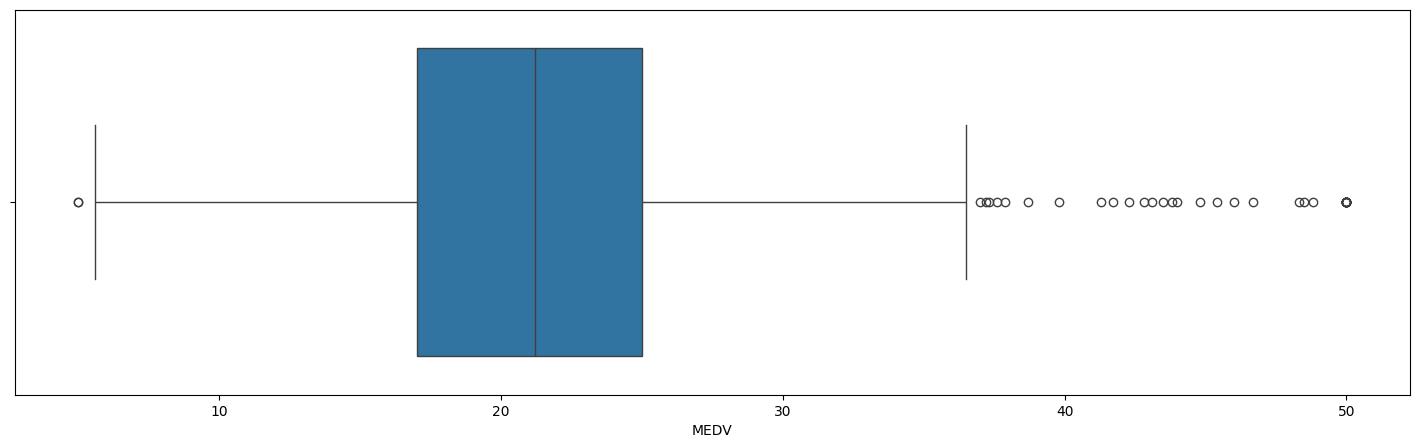

In [20]:
plt.figure(figsize=(18,5))
sns.boxplot(x=df['MEDV'])

All points before & after boxplot whiskers are `Outliers`
- Outliers on Right side are called : Upper Bound Outliers 
- Outliers on Left side are called  : Lower Bound Outliers

We can build our own function for IQR method as well:

In [21]:
def outliers_iqr(col):
    #caluclate 1st & 3rd quartile
    Q1, Q3 = np.percentile(col, [25,75])

    #calculate IQR range
    IQR = Q3 - Q1
    
    #calculate the ranges
    lower_range = Q1 - 1.5*IQR
    upper_range = Q3 + 1.5*IQR

    return lower_range, upper_range



In [22]:
# calculate the upper & lower bounds for MEDV
lower_range, upper_range = outliers_iqr(df['MEDV'])

print((f'LR: {lower_range}, UR: {upper_range}'))

LR: 5.0624999999999964, UR: 36.962500000000006


In [23]:
#Now building a Outlier Filter:

outlier_filter = (df['MEDV'] > lower_range) & (df['MEDV'] < upper_range)

df_no_outliers = df[outlier_filter]

> as outlier_filter does not belong to df's columns, we do not use '' for it in df[]

Text(0.5, 1.0, 'After Outlier Treatment')

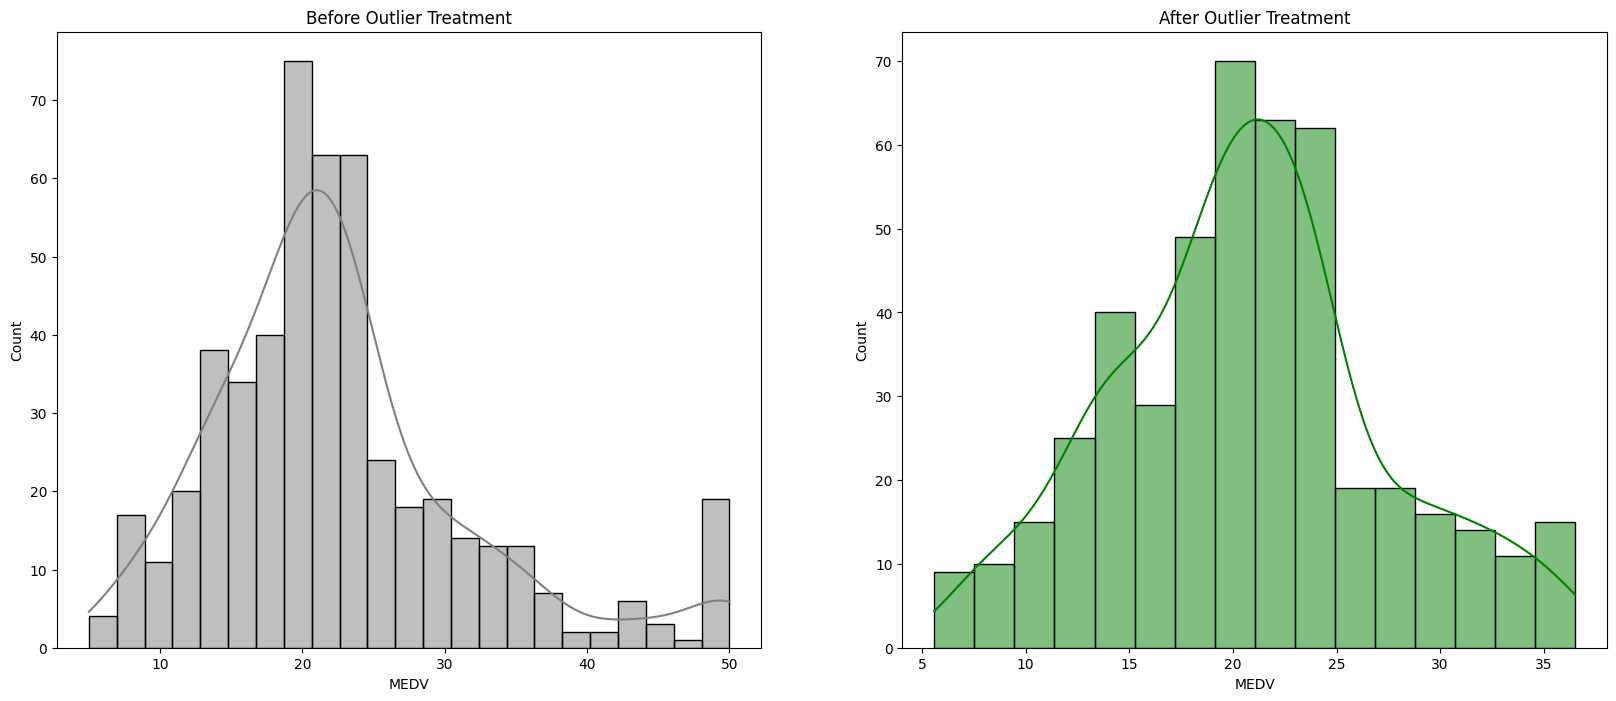

In [24]:
#subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

axes = axes.flatten()  #to access using indexes

sns.histplot(x=df['MEDV'], ax=axes[0], kde=True, color='grey')
axes[0].set_title('Before Outlier Treatment')                       #sets title on plot 1

sns.histplot(x=df_no_outliers['MEDV'], ax=axes[1], kde=True, color='green')
axes[1].set_title('After Outlier Treatment')                        #sets title on plot 2


It is always recommended to check the affect of outlier treatement for the whole dataset. We need to check if the dropping of data caused skewness to other columns

#### Checking the Outlier Treatement Impact

In [25]:
#to remove spaces from column names eg: ' CHAS' to avoid unnecessary confusion and errors -> df[' CHAS'] => df['CHAS']
df.columns = df.columns.str.strip()
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

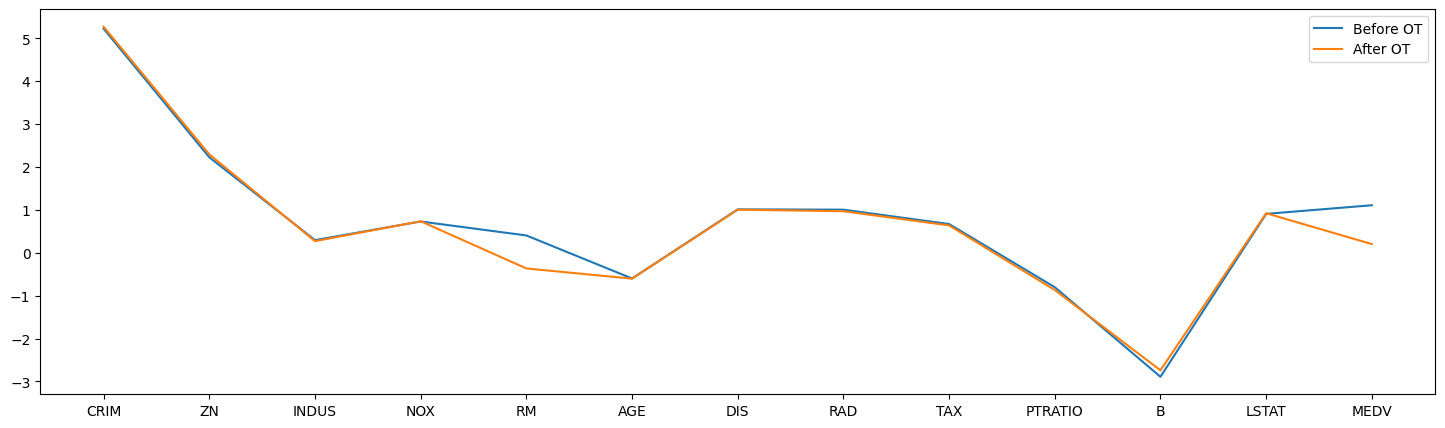

In [26]:
df_no_outliers.columns = df_no_outliers.columns.str.strip()

plt.figure(figsize=(18,5))

plt.plot(df.drop(columns='CHAS', axis=1).skew(), label='Before OT')
plt.plot(df_no_outliers.drop(columns='CHAS', axis=1).skew(), label='After OT')

#to mention the legend
plt.legend()

- We can see the process of outlier treatement for MEDV did not impact other columns negatively
- In fact, it even fixed outliers for one other column(RM)

### Using the Percentile Method

<Axes: xlabel='ZN'>

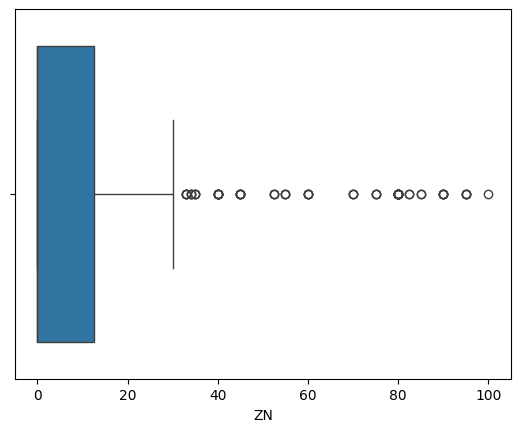

In [27]:
sns.boxplot(x=df['ZN'])

In [28]:
lower_range, upper_range = np.percentile(df['ZN'], [5,95])
print(f'LR: {lower_range}, UR: {upper_range}')

LR: 0.0, UR: 80.0


The method above allows for more flexibility and tolerance of the thresholds

## Categorical Encoding

In [29]:
data = {
    'Id': range(1, 11),
    'Age': np.random.randint(20, 60, 10),
    'Gender': np.random.choice(['Male', 'Female'], 10),
    'Education': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], 10),
    'Country': np.random.choice(['USA', 'UK', 'India', 'China', 'Brazil'], 10),
    'Satisfaction': np.random.choice(['Low', 'Medium', 'High'], 10),
    'Salary': np.random.randint(30000, 100000, 10)
}

df = pd.DataFrame(data)
df

,Id,Age,Gender,Education,Country,Satisfaction,Salary
0,1,59,Male,Master,Brazil,High,37162
1,2,41,Female,PhD,China,Medium,37969
2,3,52,Male,High School,India,Medium,66955
3,4,55,Male,Bachelor,USA,High,32092
4,5,39,Female,High School,India,Low,63037
5,6,30,Female,Master,USA,Medium,80996
6,7,28,Female,Master,UK,Medium,60000
7,8,23,Male,Master,Brazil,High,83672
8,9,32,Female,High School,Brazil,High,68884
9,10,22,Female,Master,Brazil,Low,53230


We need to encode: Gender, Education, Country & Satisfaction

In [30]:
df

,Id,Age,Gender,Education,Country,Satisfaction,Salary
0,1,59,Male,Master,Brazil,High,37162
1,2,41,Female,PhD,China,Medium,37969
2,3,52,Male,High School,India,Medium,66955
3,4,55,Male,Bachelor,USA,High,32092
4,5,39,Female,High School,India,Low,63037
5,6,30,Female,Master,USA,Medium,80996
6,7,28,Female,Master,UK,Medium,60000
7,8,23,Male,Master,Brazil,High,83672
8,9,32,Female,High School,Brazil,High,68884
9,10,22,Female,Master,Brazil,Low,53230


We have 3 main types of Encoding techniques:
- **Label Encoding**: standard. It doesn't care about order eg: Gender: Male vs Female (use when you have Binary Categories)
- **Ordinal Encoding**: use if the column has ordinal characteristic eg: Education: elementary, high school, graduate, MBA (or) 1,2,3,4
- **One Hot Encoding**: use if the column does not have ordinal characteristic eg: Blue, Green, Red

### Label Encoding
- data preprocessing technique used in machine learning to convert categorical data into numerical format

In [31]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [32]:
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})
df

,Id,Age,Gender,Education,Country,Satisfaction,Salary
0,1,59,0,Master,Brazil,High,37162
1,2,41,1,PhD,China,Medium,37969
2,3,52,0,High School,India,Medium,66955
3,4,55,0,Bachelor,USA,High,32092
4,5,39,1,High School,India,Low,63037
5,6,30,1,Master,USA,Medium,80996
6,7,28,1,Master,UK,Medium,60000
7,8,23,0,Master,Brazil,High,83672
8,9,32,1,High School,Brazil,High,68884
9,10,22,1,Master,Brazil,Low,53230


> it should have replaced all 'Males' by '0' & 'Females' by '1' in Gender column

### Ordinal Encoding 
- data preprocessing technique used in machine learning to convert categorical data with a natural hierarchy or rank into numerical values

In [33]:
df['Satisfaction'].unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [34]:
df['Satisfaction'] = df['Satisfaction'].map({'Low':0, 'Medium':1, 'High':2})
df

,Id,Age,Gender,Education,Country,Satisfaction,Salary
0,1,59,0,Master,Brazil,2,37162
1,2,41,1,PhD,China,1,37969
2,3,52,0,High School,India,1,66955
3,4,55,0,Bachelor,USA,2,32092
4,5,39,1,High School,India,0,63037
5,6,30,1,Master,USA,1,80996
6,7,28,1,Master,UK,1,60000
7,8,23,0,Master,Brazil,2,83672
8,9,32,1,High School,Brazil,2,68884
9,10,22,1,Master,Brazil,0,53230


### One-hot Encoding
- preprocessing technique that transforms categorical variables into a series of binary (0 or 1) columns

![en](https://miro.medium.com/v2/resize:fit:1200/1*ggtP4a5YaRx6l09KQaYOnw.png)

> It is like an Adjacency Matrix

In [35]:
df= pd.get_dummies(df, columns=['Country'])
df

,Id,Age,Gender,Education,Satisfaction,Salary,Country_Brazil,Country_China,Country_India,Country_UK,Country_USA
0,1,59,0,Master,2,37162,True,False,False,False,False
1,2,41,1,PhD,1,37969,False,True,False,False,False
2,3,52,0,High School,1,66955,False,False,True,False,False
3,4,55,0,Bachelor,2,32092,False,False,False,False,True
4,5,39,1,High School,0,63037,False,False,True,False,False
5,6,30,1,Master,1,80996,False,False,False,False,True
6,7,28,1,Master,1,60000,False,False,False,True,False
7,8,23,0,Master,2,83672,True,False,False,False,False
8,9,32,1,High School,2,68884,True,False,False,False,False
9,10,22,1,Master,0,53230,True,False,False,False,False


## Data Scaling
- critical preprocessing step in machine learning (ML) that transforms numerical features into a consistent range or distribution

We have 2 common types in data scaling:
- Normalization:
    - function name: `MinMaxScaler()`
    - outcome: scales data to fixed range between 0(minimum) & 1(maximum)
    - The range could be sensitive to outliers
    - Prefered for Neural Networks

- Standardization
    - function name: `StandardScaler()`
    - outcome: scales data to range with mean of 0 & standard deviation of 1

In [36]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [37]:
df_example = df[['Age', 'Gender', 'Satisfaction', 'Salary']]


In [38]:
# normalization

df_example_mm_scaled = MinMaxScaler().fit_transform(df_example)
df_example_mm_scaled

array([[1.        , 0.        , 1.        , 0.09829391],
       [0.51351351, 1.        , 0.5       , 0.11393951],
       [0.81081081, 0.        , 0.5       , 0.67590151],
       [0.89189189, 0.        , 1.        , 0.        ],
       [0.45945946, 1.        , 0.        , 0.59994184],
       [0.21621622, 1.        , 0.5       , 0.94811943],
       [0.16216216, 1.        , 0.5       , 0.54106243],
       [0.02702703, 0.        , 1.        , 1.        ],
       [0.27027027, 1.        , 1.        , 0.71329973],
       [0.        , 1.        , 0.        , 0.40981   ]])

In [39]:
# standard scaler

df_example_ss_scaled = StandardScaler().fit_transform(df_example)
df_example_ss_scaled


array([[ 1.64363245, -1.22474487,  1.06904497, -1.23782171],
       [ 0.22806383,  0.81649658, -0.26726124, -1.19078638],
       [ 1.09313354, -1.22474487, -0.26726124,  0.49863856],
       [ 1.32906164, -1.22474487,  1.06904497, -1.53332245],
       [ 0.07077843,  0.81649658, -1.60356745,  0.27028118],
       [-0.63700588,  0.81649658, -0.26726124,  1.31700658],
       [-0.79429128,  0.81649658, -0.26726124,  0.09327216],
       [-1.18750478, -1.22474487,  1.06904497,  1.47297502],
       [-0.47972047,  0.81649658,  1.06904497,  0.61106872],
       [-1.26614748,  0.81649658, -1.60356745, -0.30131167]])